imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

2024-01-28 14:41:36.740797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 14:41:36.740928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 14:41:36.743866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 14:41:36.761339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-28 14:41:38.520905: W tensorflow/compiler/tf2

load the data

In [73]:
#download the data
df=pd.read_csv("dataset.tsv",sep='\t')

In [3]:
df.head()

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern


preprocessing

In [4]:
#check for missing values
df.isnull().sum()

page_id             0
text                0
label               0
Pattern Category    0
dtype: int64

In [5]:
#check the distribution of the target variable
df["Pattern Category"].value_counts()

Not Dark Pattern    1178
Scarcity             418
Social Proof         312
Urgency              210
Misdirection         195
Obstruction           27
Sneaking              12
Forced Action          4
Name: Pattern Category, dtype: int64

In [76]:
lable_index=df["Pattern Category"].unique()
lable_index


array(['Urgency', 'Not Dark Pattern', 'Scarcity', 'Misdirection',
       'Social Proof', 'Obstruction', 'Sneaking', 'Forced Action'],
      dtype=object)

/tmp/ipykernel_11209/2033255254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Pattern Category"],palette="Set2")


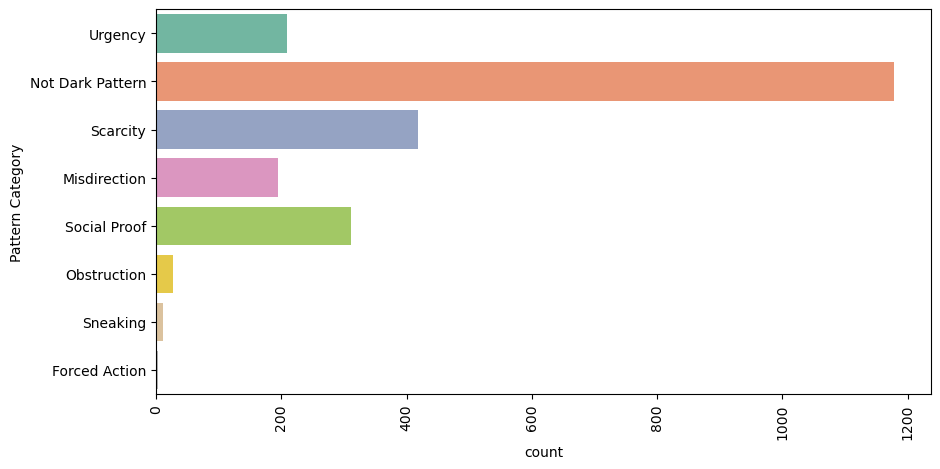

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(df["Pattern Category"],palette="Set2")
plt.xticks(rotation=90)
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Pattern Category"]=le.fit_transform(df["Pattern Category"])
df["Pattern Category"].value_counts()
df.head()

#text encoding
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df["text"])


In [89]:

#store the vocabulary
vocab=cv.vocabulary_
import pickle
pickle.dump(vocab,open("vocab.pkl","wb"))
pickle.dump(lable_index,open("lable_index.pkl","wb"))

dir(tf.keras.Model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_aggregate_exact_metrics',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_autographed_call',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compile_was_called',
 '_compute_dtype',
 '_configure_steps_per_execution',
 '_copy_trackable_to_cpu',
 '_create_counter_variable',
 '_dedup_weights',
 '_def

In [9]:
#load the vocabulary
vocab=pickle.load(open("vocab.pkl","rb"))
vocab
loaded_lable_index=pickle.load(open("lable_index.pkl","rb"))
cv=CountVectorizer(vocabulary=vocab)

In [10]:
x=cv.fit_transform(df["text"])

In [11]:
print(x.shape)

(2356, 3867)


In [12]:
y=df["Pattern Category"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection._search import GridSearchCV
from sklearn.

In [41]:
#model building
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)


0.9110169491525424

In [42]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)


0.9279661016949152

In [43]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)


/root/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6546610169491526

In [44]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)


0.913135593220339

In [37]:
model.fit(x_train,y_train)


/root/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [38]:
model.score(x_test,y_test)

0.6546610169491526

In [60]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1],1)))
cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(8,activation='softmax'))
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3865, 32)          128       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1932, 32)          0         


 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 61824)             0         
                                                                 
 dense_3 (Dense)             (None, 8)                 494600    
                                                                 
Total params: 494728 (1.89 MB)
Trainable params: 494728 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
x_train=x_train.toarray()
x_test=x_test.toarray()
y_train=np.array(y_train)
y_test=np.array(y_test)


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [62]:
ret=cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min')
                    ,tf.keras.callbacks.ModelCheckpoint('cnn.h5',save_best_only=True)
                    ,tf.keras.callbacks.TensorBoard(log_dir='logs')
                    ,tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,mode='min')])

Epoch 1/50
30/30 [==============================] - 3s 47ms/step - loss: 1.4143 - accuracy: 0.5191 - val_loss: 1.0261 - val_accuracy: 0.5975 - lr: 0.0010
Epoch 2/50
 1/30 [>.............................] - ETA: 0s - loss: 1.0571 - accuracy: 0.6094

/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 1s 21ms/step - loss: 0.7956 - accuracy: 0.7521 - val_loss: 0.6541 - val_accuracy: 0.8411 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 1s 21ms/step - loss: 0.4596 - accuracy: 0.9045 - val_loss: 0.4564 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 1s 22ms/step - loss: 0.2862 - accuracy: 0.9384 - val_loss: 0.3718 - val_accuracy: 0.9047 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 1s 21ms/step - loss: 0.2036 - accuracy: 0.9570 - val_loss: 0.3239 - val_accuracy: 0.9068 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 1s 22ms/step - loss: 0.1533 - accuracy: 0.9697 - val_loss: 0.2960 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 7/50
30/30 [==============================] - 1s 22ms/step - loss: 0.1199 - accuracy: 0.9745 - val_loss: 0.2837 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 8/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0981 - accur

In [63]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3865, 32)          128       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1932, 32)          0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 61824)             0         
                                                                 
 dense_3 (Dense)             (None, 8)                 494600    
                                                                 
Total params: 494728 (1.89 MB)
Trainable params: 494728 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


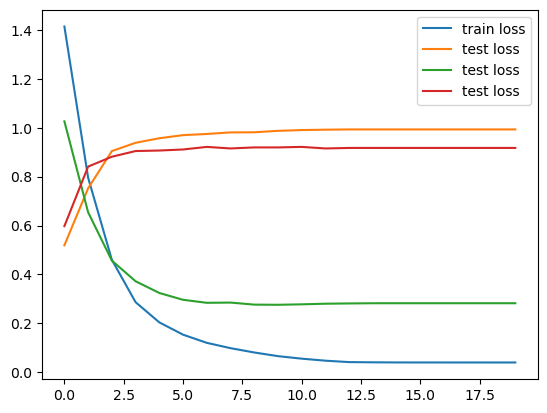

In [65]:
plt.plot(ret.history['loss'],label='train loss')
plt.plot(ret.history['accuracy'],label='test loss')
plt.plot(ret.history['val_loss'],label='test loss')
plt.plot(ret.history['val_accuracy'],label='test loss')
plt.legend()

In [ ]:
cnn.evaluate(x_test,y_test)

15/15 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.9301


[0.2857142984867096, 0.930084764957428]

In [71]:
rnn=tf.keras.models.Sequential()
rnn.add(tf.keras.layers.Embedding(input_dim=10000,output_dim=128,input_length=100,input_shape=(x_train.shape[1],1)))    
rnn.add(tf.keras.layers.LSTM(128,return_sequences=True))
rnn.add(tf.keras.layers.LSTM(64,return_sequences=False))
rnn.add(tf.keras.layers.Dense(8,activation='softmax'))
rnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
rnn.summary()

ValueError: Input 0 of layer "lstm_8" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 3867, 1, 128)

In [69]:
rnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min')
                    ,tf.keras.callbacks.ModelCheckpoint('cnn.h5',save_best_only=True)
                    ,tf.keras.callbacks.TensorBoard(log_dir='logs')
                    ,tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,mode='min')])

Epoch 1/50


ValueError: in user code:

    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 3867)


In [54]:
np.unique(y_test,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([ 38, 244,   6,  81,   2,  54,  47]))

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min')
                    ,tf.keras.callbacks.ModelCheckpoint('rnn.h5',save_best_only=True)
                    ,tf.keras.callbacks.TensorBoard(log_dir='logs')
                    ,tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,mode='min')])

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert defined at (most recent call last):
  File "/root/miniconda3/envs/tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/root/miniconda3/envs/tf/lib/python3.10/runpy.py", line 86, in _run_code

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/root/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/root/miniconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/root/miniconda3/envs/tf/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_5449/624351189.py", line 1, in <module>

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/root/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

assertion failed: [Condition x == y did not hold element-wise:] [x (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [64 1] [y (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [64 3]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert}}]] [Op:__inference_train_function_48846]

In [ ]:
#create a function to plot the loss and accuracy
def plot_loss_accuracy(ret):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[0].plot(ret.history['loss'],label='loss')
    ax[0].plot(ret.history['val_loss'],label='val_loss')
    ax[0].legend()
    ax[1].plot(ret.history['accuracy'],label='accuracy')
    ax[1].plot(ret.history['val_accuracy'],label='val_accuracy')
    ax[1].legend()
    plt.show()

In [ ]:
plot_loss_accuracy(ret)

NameError: name 'ret' is not defined

In [ ]:
#ensemble model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)


In [ ]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))
model=pickle.load(open("model.pkl","rb"))

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pickle

def text_cleaning(text):
    lemmatizer=WordNetLemmatizer()
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub(' +',' ',text)
    text=[lemmatizer.lemmatize(token) for token in text.split(" ")]
    stop_words=stopwords.words('english')
    text=[lemmatizer.lemmatize(token) for token in text if token not in stop_words]
    text=" ".join(text)
    return text
url=""
requests.get(url)
soup=BeautifulSoup(url.content)
text=soup.get_text()
text=text_cleaning(text)
text=cv.transform([text])
model.predict(text)


In [84]:
import flask_cors
import flask
import requests
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn

def load_model():
    global model
    model=pickle.load(open("model.pkl","rb"))
    global cv
    library=pickle.load(open("vocab.pkl","rb"))
    cv=sklearn.feature_extraction.text.CountVectorizer(vocabulary=library)
    global model
    model=tf.keras.load_model("cnn.h5")
    global lable_index
    lable_index=pickle.load(open("lable_index.pkl","rb"))

app=flask.Flask(__name__)
@app.route('/',methods=['GET'])
def main():
    if flask.request.method=='GET':
        return(flask.render_template('index.html'))
@app.route('/predict',methods=['GET','POST'])
def predict():
    words=request.form['words']
    words=text_cleaning(words)
    words=cv.transform([words])
    prediction=model.predict(words)
    output=prediction[0]
    np.argmax(output)
    
    return flask.render_template('index.html',prediction_text='The pattern category is {}'.format(output))

    
    
    

SyntaxError: name 'model' is assigned to before global declaration (3444451540.py, line 16)

Note: you may need to restart the kernel to use updated packages.
